# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors.  The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this activity shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages 



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

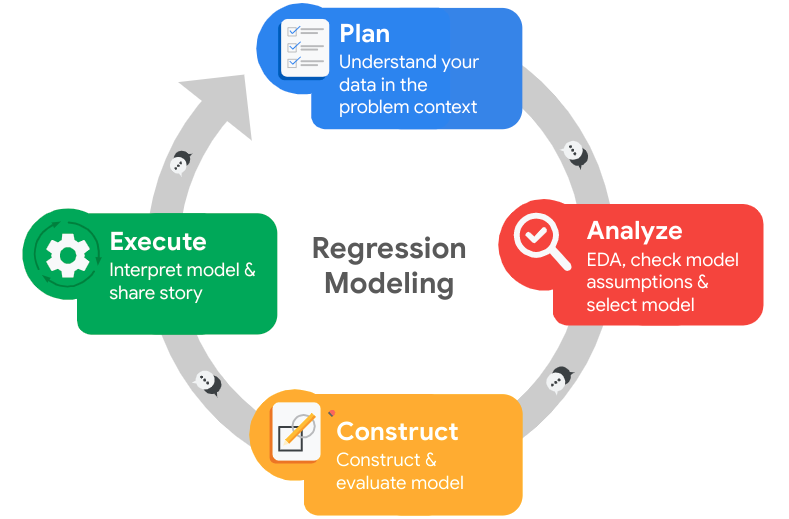

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭 
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
=> Leadership team with Salifort Motors expecting recommendations on what drives employee turnover. But it leaves it up to me which model to choose from (statistical or ML model)
=> HR surveys a sample of employees to learn more about what might be driving turnover
=> Salifort’s senior leadership team
- What are you trying to solve or accomplish? 
=> Design a model that predicts whether an employee will leave the company based on their department, number of projects, average monthly hours, and any other data points we identify relevant.
- What are your initial observations when you explore the data?
=> 2 floats, several integers, 2 object dtypes
=> basic stats show few outliers but based on given company specific information we cannot assume any wrong entries apart from the existing duplicate rows that we remove (obviously wrong)
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
=> just the basic EDA over variable identification, type of variables, missing value treatment, outlier detection, impact on data set and treatment, feature engineering (variables)
- Do you have any ethical considerations in this stage? => false positive case: company has unnecessary costs to retain actually not leaving employees - false negative: key employees may leave and the company may have issues replacing these or at a higher costs due to trainings or ineffiencies in short term (until new employees are recruited and trained on the job and experienced)




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [141]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [142]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ### 
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data

In [143]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [144]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [145]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [146]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [147]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [148]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data (total rows: 14999).

In [149]:
# Inspect some rows containing duplicates as needed: ordery by all fields in df to find "unloved neighbours"

df0[df0.duplicated()].sort_values(by=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


It is very unlikely two employees self-reported the very same response for each field.

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [150]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

#check if duplicates removed
print(df1.duplicated().sum())

# Display first few rows of new dataframe as needed
df1.head()

0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

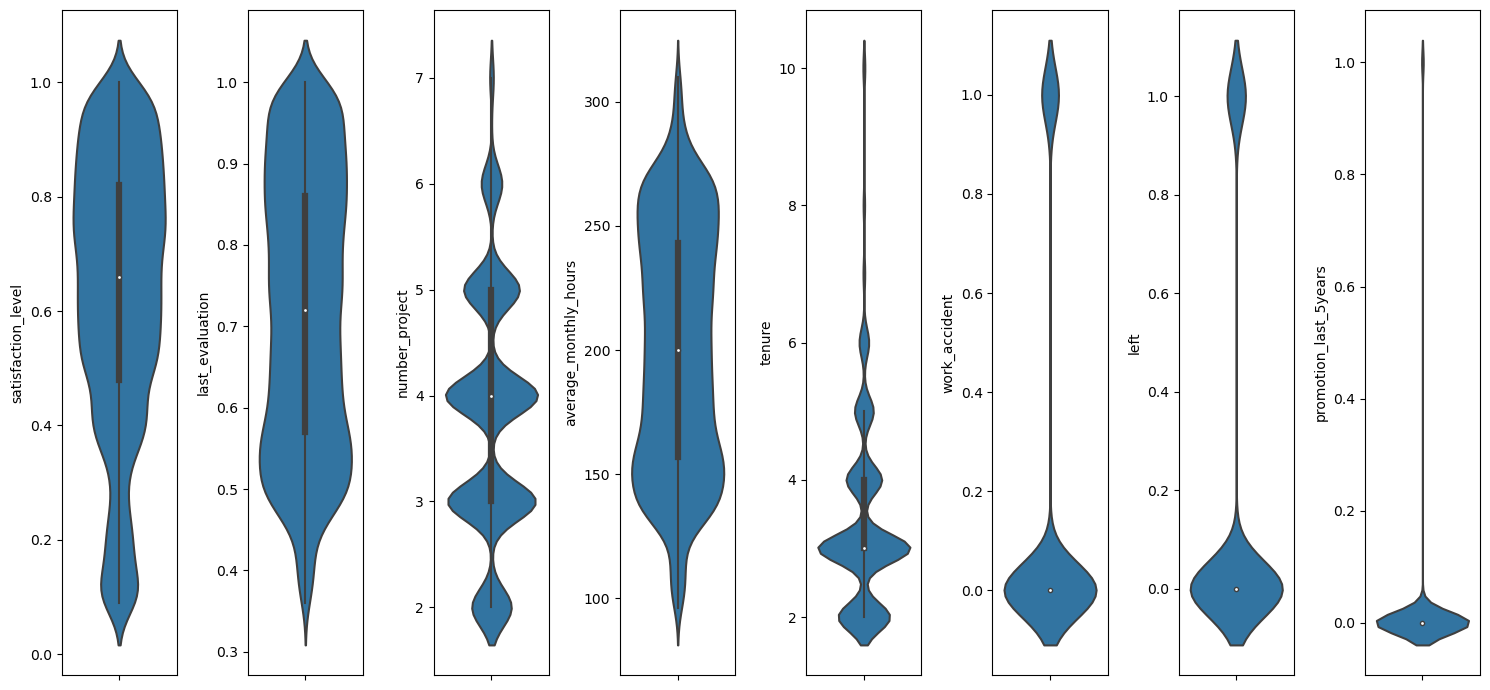

In [151]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
#plt.figure(figsize=(4,6))
#plt.title('Boxplot to detect outliers for tenure', fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#sns.boxplot(y=df1['tenure'])
#sns.stripplot(y=df1['tenure'], alpha=0.1)
fig, ax = plt.subplots(1, 8, figsize = (15,7))
sns.violinplot(data=df1, y=df1['satisfaction_level'], hue='left', orient='v', split=True, ax=ax[0])
sns.violinplot(data=df1, y=df1['last_evaluation'], hue='left', orient='v', split=True, ax=ax[1])
sns.violinplot(data=df1, y=df1['number_project'], hue='left', orient='v', split=True, ax=ax[2])
sns.violinplot(data=df1, y=df1['average_monthly_hours'], hue='left', orient='v', split=True, ax=ax[3])
sns.violinplot(data=df1, y=df1['tenure'], hue='left', split=True, orient='v', ax=ax[4])
sns.violinplot(data=df1, y=df1['work_accident'], hue='left', split=True, orient='v', ax=ax[5])
sns.violinplot(data=df1, y=df1['left'], hue='left', split=True, orient='v', ax=ax[6])
sns.violinplot(data=df1, y=df1['promotion_last_5years'], hue='left', orient='v', split=True, ax=ax[7])
fig.tight_layout()
plt.show()






Amongst the other variable it can be seen the `tenure` column has outliers. Secondly, per each column it can be seen also how data is distributed, e.g very few employees got promoted.

In [152]:
# Determine the number of rows containing outliers 


# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)
print("percentile25:",percentile25 )

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)
print("percentile75:",percentile75 )

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows containing outliers in `tenure`:", len(outliers))

percentile25: 3.0
percentile75: 4.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

# PACE: Analyze Stage
- Perform EDA (analyze relationships between variables) 




### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables? --see inline
- What do you observe about the distributions in the data? --see inline
- What transformations did you make with your data? Why did you chose to make those decisions? --> salary and department seem to be candidates for (see upcoming constuct stage for details)
- What are some purposes of EDA before constructing a predictive model? --> understand variables, distribution of variables, plot relationship between independent and dependent variables and identify the best predictor variables
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.) --> past follow along materials from the course 
- Do you have any ethical considerations in this stage? --> as there is no personal information of employees listed: no




## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

You could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

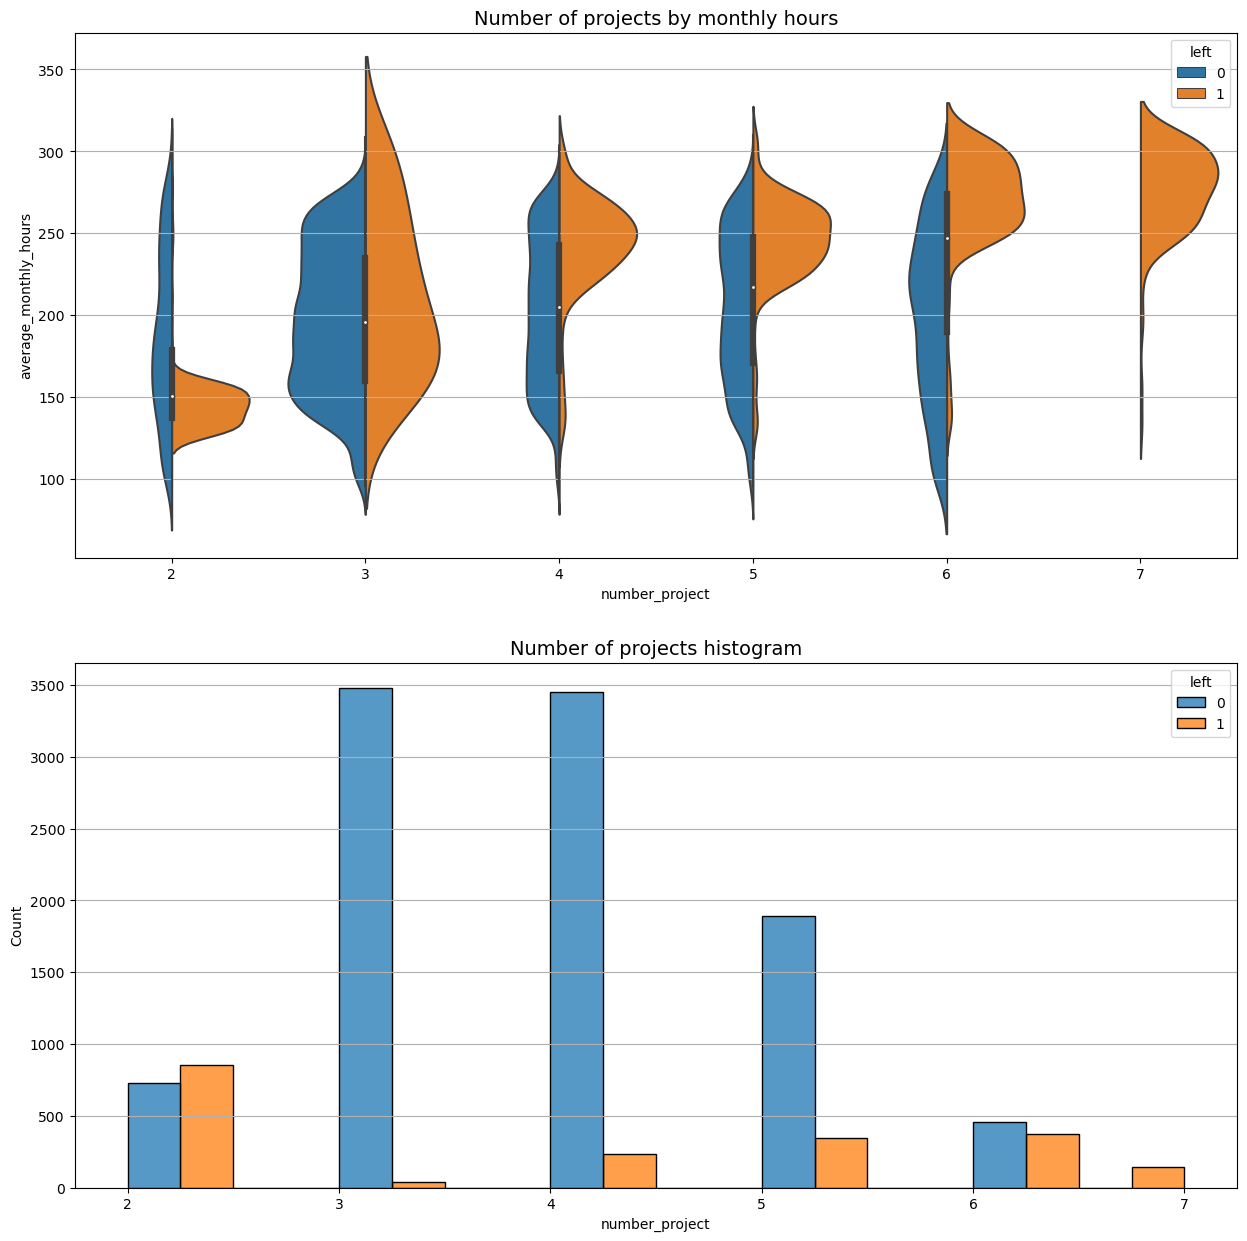

In [153]:
# Create a plot on number of projects variable

# Set figure and axes
fig, ax = plt.subplots(2, 1, figsize = (15,15))

# Create boxplot or violinplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed vs those who left
#sns.boxplot(data=df1, notch=True, x='number_project', y='average_monthly_hours', width=0.5, hue='left', orient="v", ax=ax[0])
#sns.stripplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', orient="v", ax=ax[0], palette=['darkorange','dodgerblue'], size=3, alpha=0.4)

sns.violinplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', split=True, ax=ax[0])
ax[0].yaxis.grid(True)
ax[0].set_title('Number of projects by monthly hours', fontsize='14')


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', binwidth = 0.5,  ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')
ax[1].yaxis.grid(True)

# Display the plots
plt.show()

People who work on more projects are working longer hours, mean hours of each group (stayed and left) is increasing with number of projects worked. 

Observations can be made:

1. There are two groups of employees who left the company: (A) those who worked less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255;295 hours/week;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3;4.

4. As employees leaving the company had more average monthly work hours than those staying, it seems the former left due to overworking.

Next, verify all employees with seven projects left.

In [154]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts() #expected: results in 1 (left) with 145 occurencies AND no results for 0 (not left) at all (no rows) 

1    145
Name: left, dtype: int64

This confirms all employees with 7 projects did leave. 

Next, examine the average monthly hours (former on y axis) versus the satisfaction levels. 

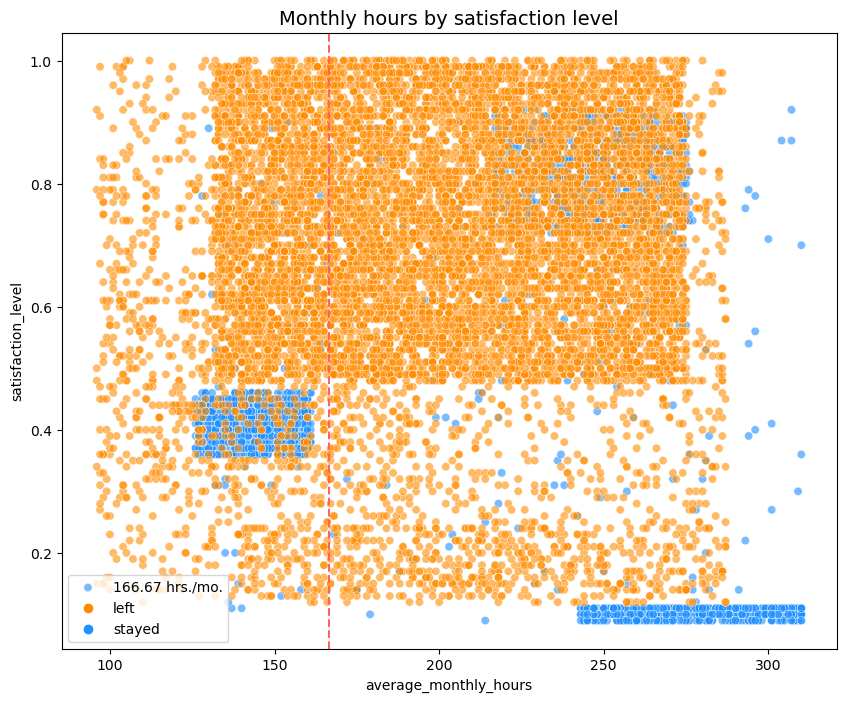

In [155]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.6, palette=['darkorange','dodgerblue'], legend='full')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

As per scatterplot there are many employees who worked ~240 to 315 hours per month. Overworking may lower substantially employee satisfaction 0.1 (see lower right corner)

The plot also shows another group of people (with normal working hours) who left (see middle side) having satisfaction approx. 0.4. 

It's difficult assume anything about this group: Either they felt pressured to work more, considering so many of their peers worked longer. And that pressure could have lowered their satisfaction levels. Or, they silently quit long time ago and as such were underperforming (working less), knowingly they would anyways quit the job for sure so not investing in long working hours.

Finally, there is a group who worked ~210 to 280 hours per month, and they had satisfaction levels ranging ~0.7 to 0.9 (see top right quadrant). 

Note the strange shape of the distributions of data points is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize (former on y axis) satisfaction levels by tenure.

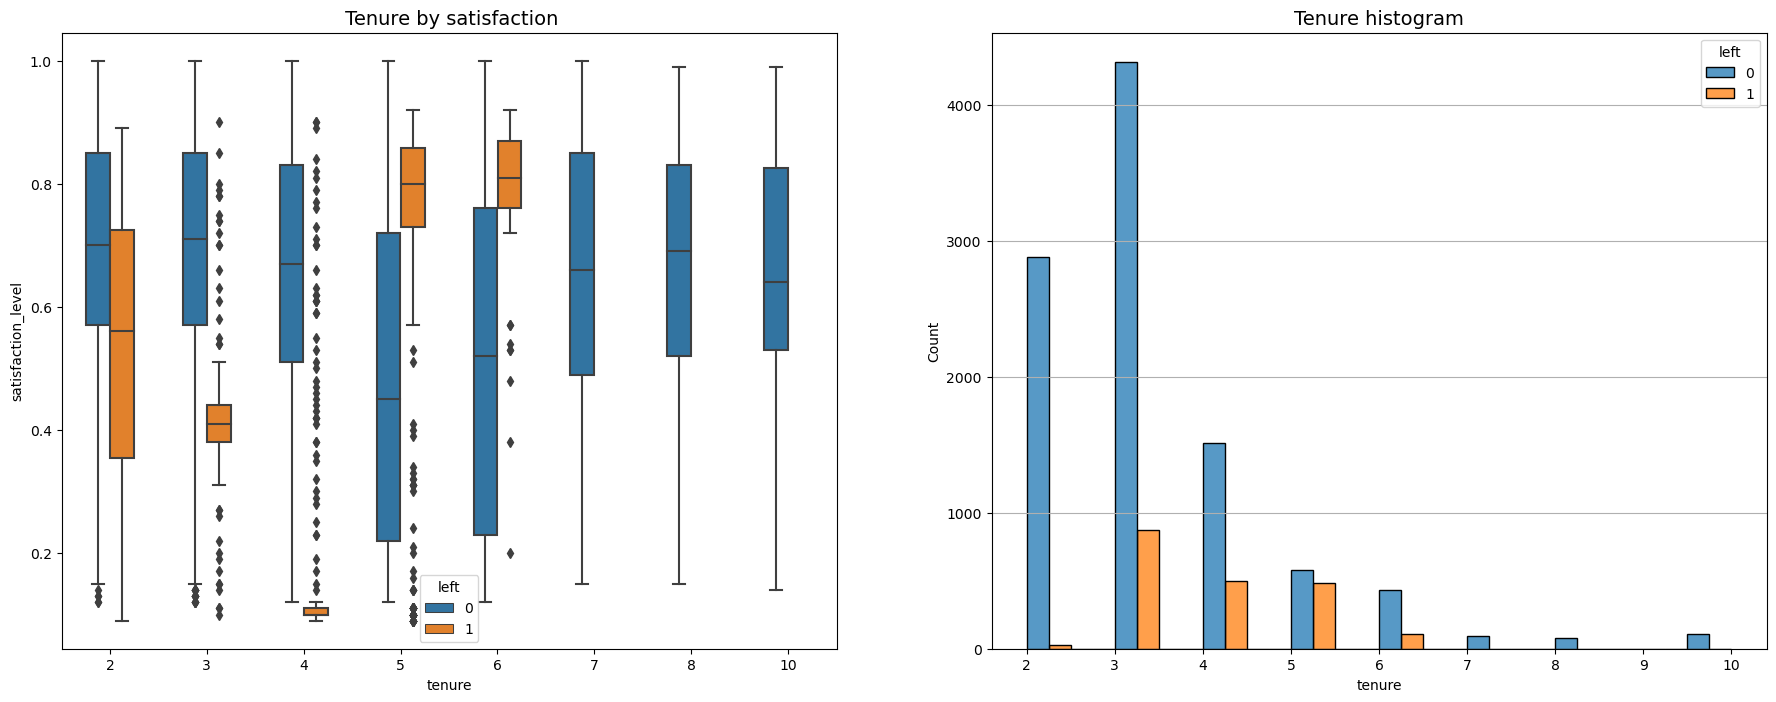

In [156]:
# Create a plot on tenure variable 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='tenure', y='satisfaction_level', width=0.5, hue='left', orient="v", ax=ax[0])
ax[0].set_title(' Tenure by satisfaction', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', binwidth = 0.5,  ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
ax[1].yaxis.grid(True)
plt.show();

Observations from this plot:
- The majority of employees who left the company had rather lower satisfaction levels than those who remained. Lowest satisfaction levels were assigned by those leaving, still there are remaining employees (5/6 years tenure) with satisfaction levels on the moderate low end. 
- Employees who left represent 2 groups : dissatisfied employees with short tenures and very satisfied employees (~0.8 sl) with medium tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees (> 6 years) didn't leave. Their satisfaction levels are aligned with those of newer employees (years < 5) who stayed. 
- The histogram shows there are relatively few longer-tenured employees. It's possible that they are the higher-ranking, higher-paid managers.

As next analysis step: calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [157]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Next, to examine salary levels for different tenures (former on x axis).

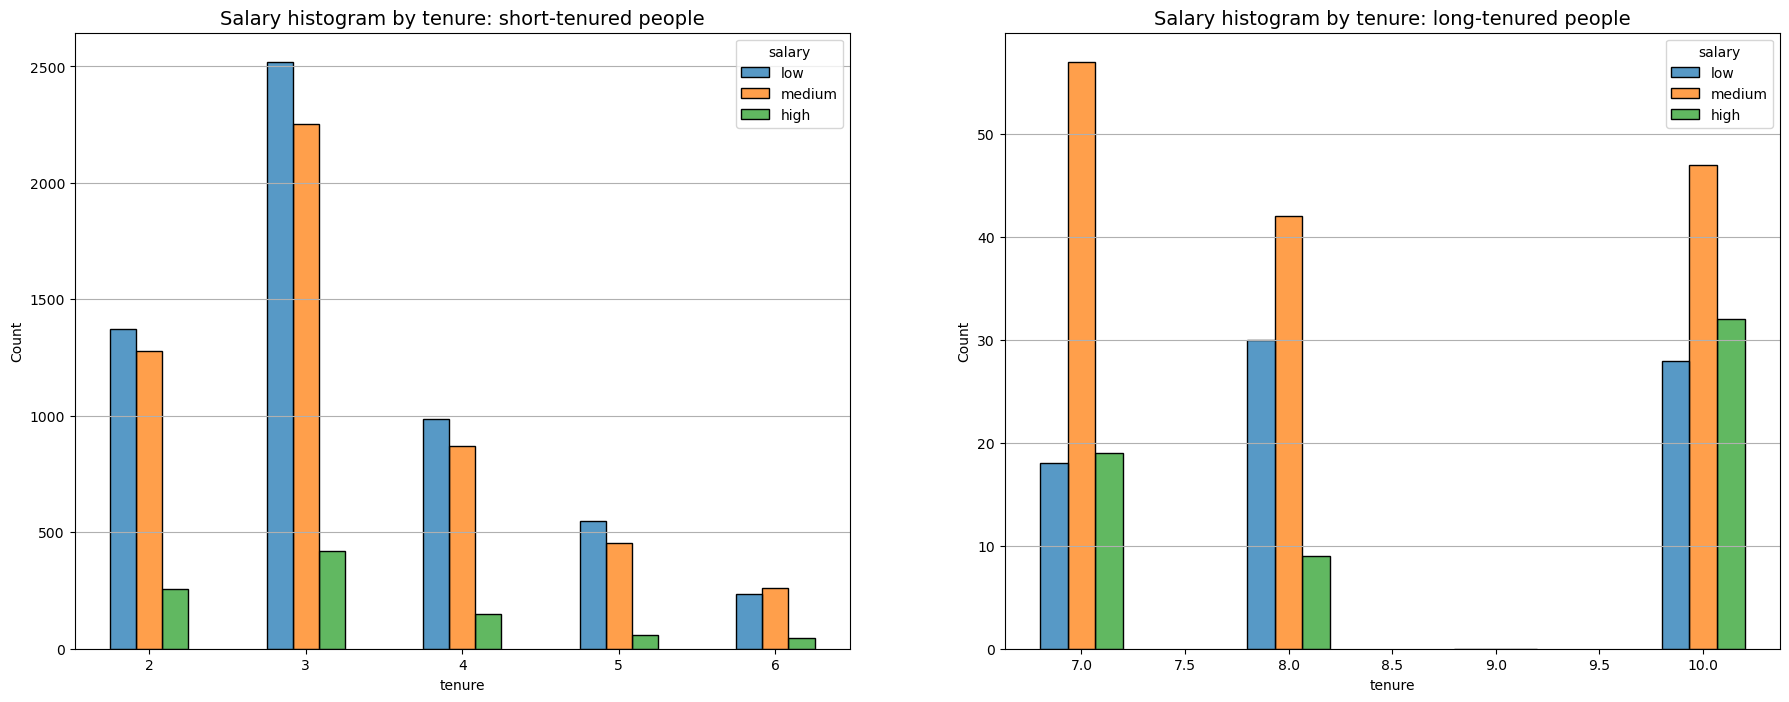

In [158]:
# Create 2 histograms based on tenure value with multiple bars based on salary level

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]



# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')
ax[0].yaxis.grid(True)
# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');
ax[1].yaxis.grid(True)

The plots above show long-tenured employees (tenure > 6) were comprised of higher-paid employees.

Next, explore if there's a correlation between working long hours and receiving high evaluation scores. Implementing a scatterplot of `average_monthly_hours` versus `last_evaluation`.

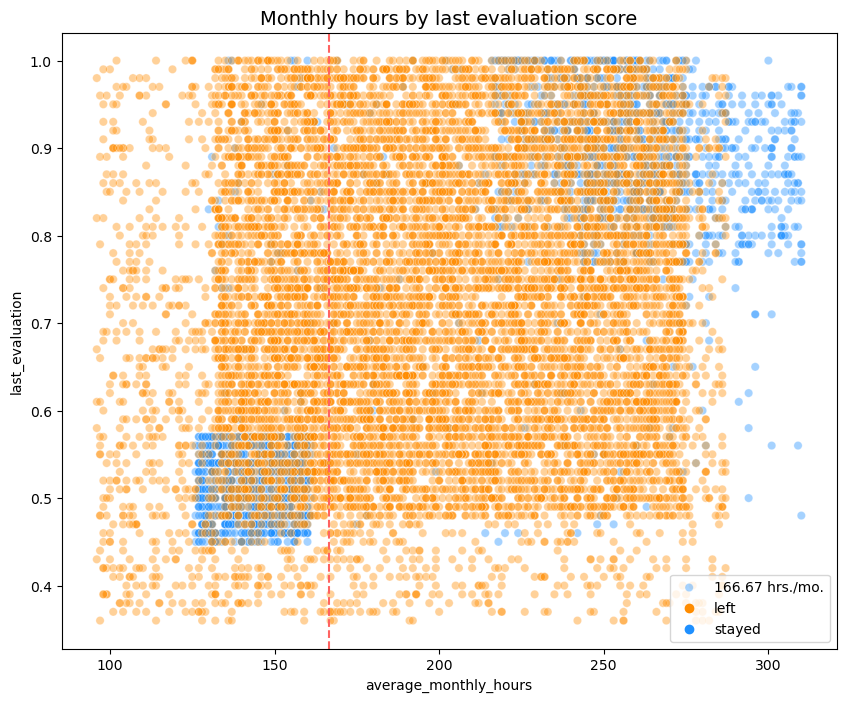

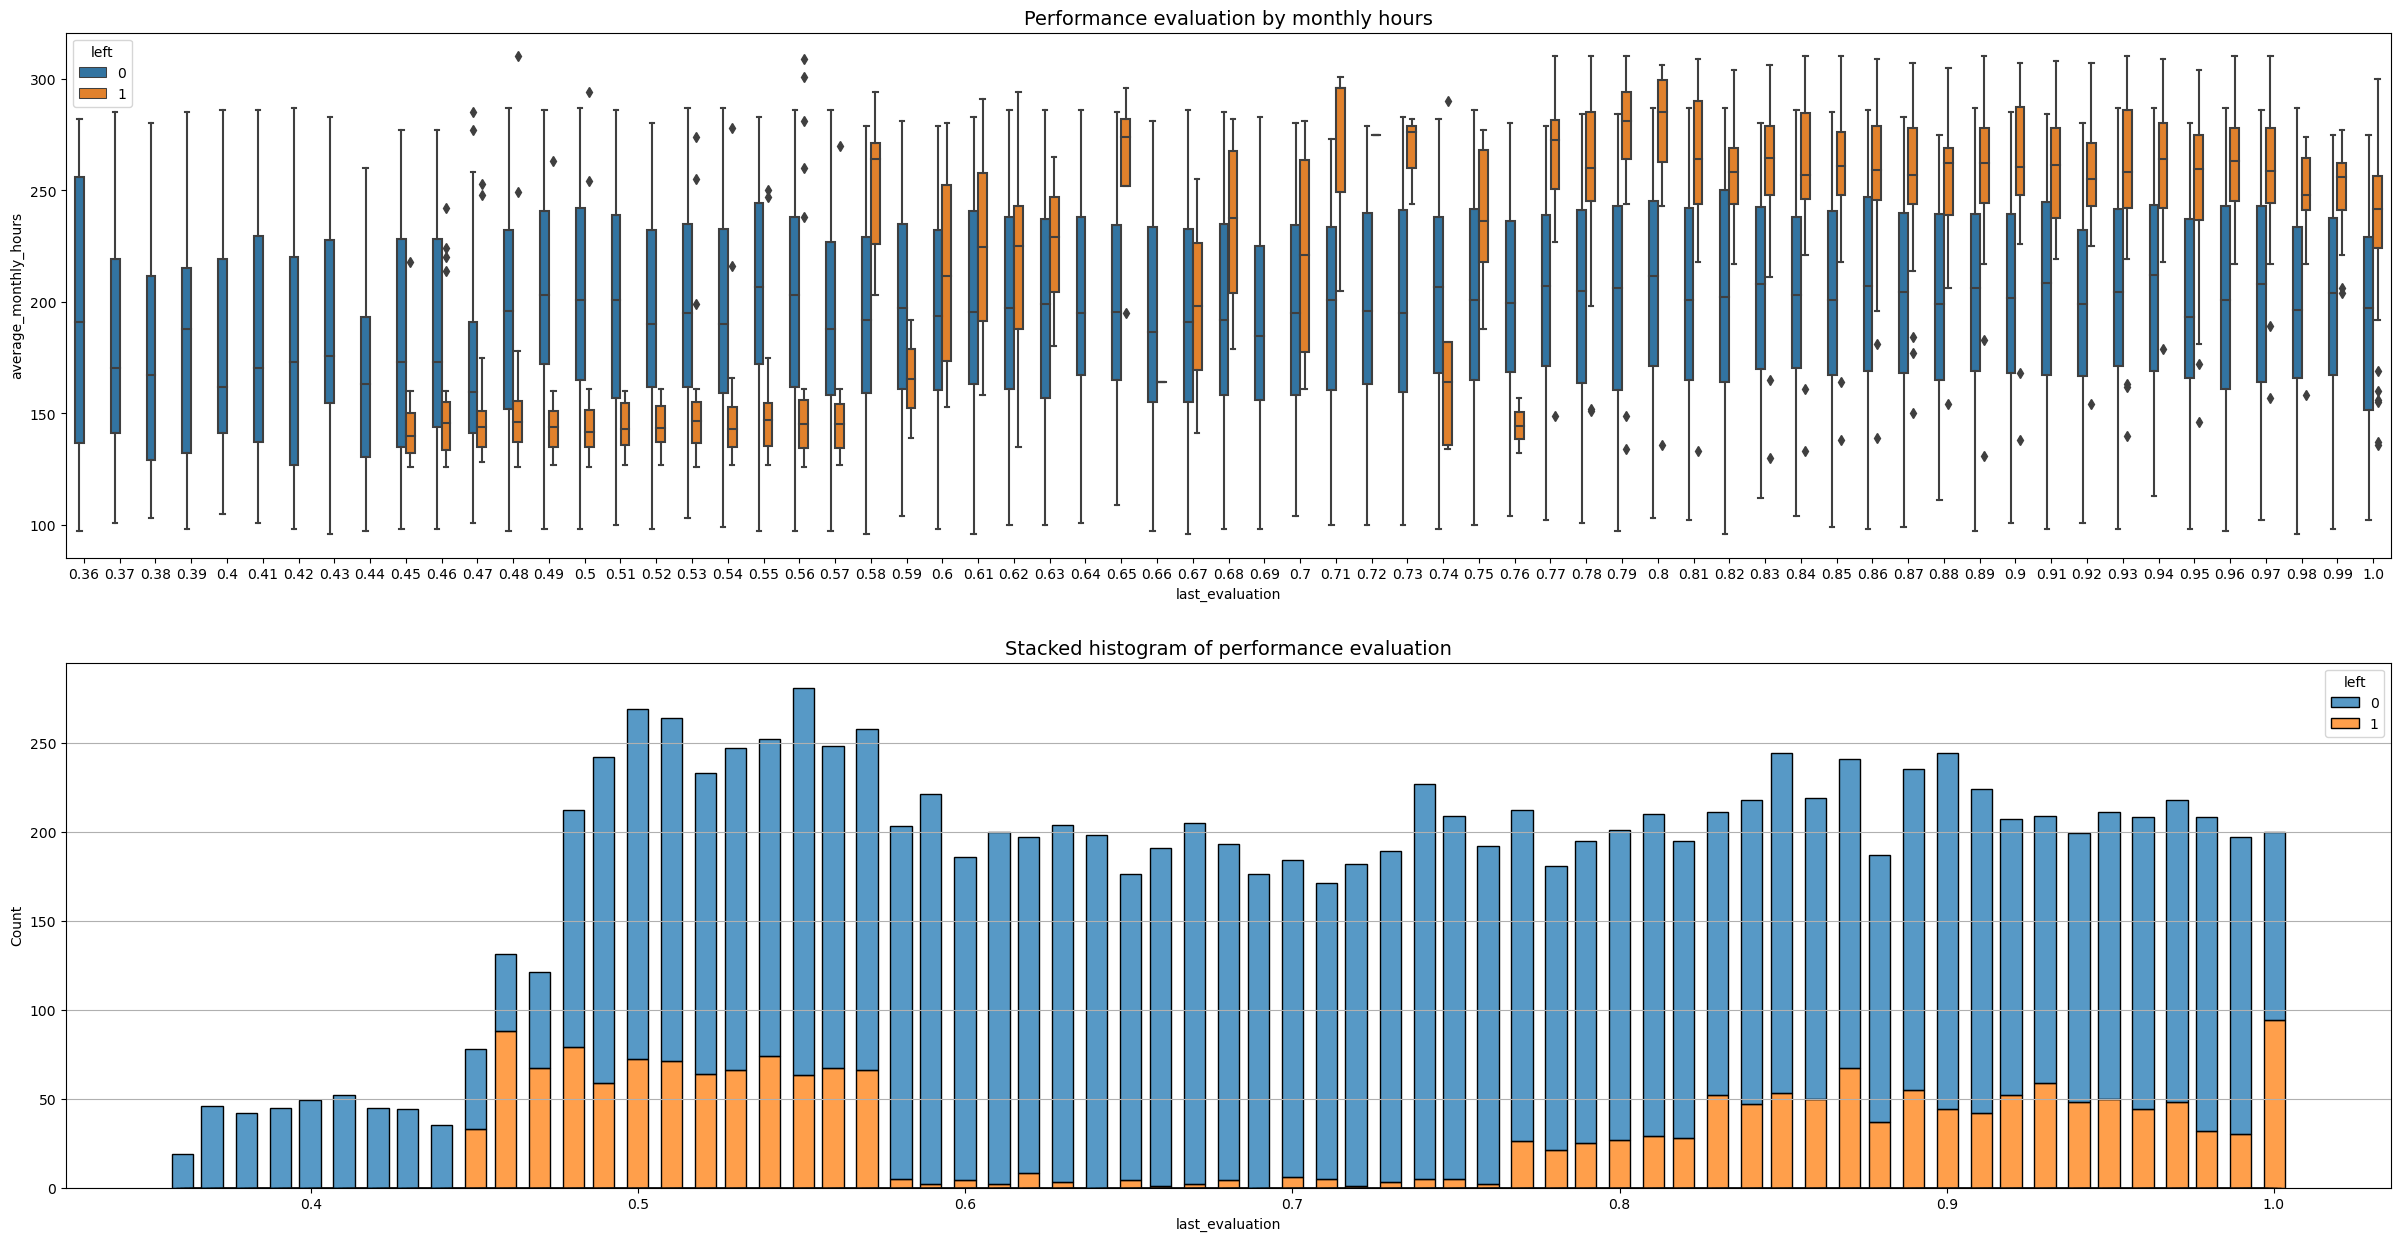

In [159]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4, palette=['darkorange','dodgerblue'], legend='full')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


# Plot histogram of performance score of employees that left 

# Set figure and axes
fig, ax = plt.subplots(2, 1, figsize = (30,15))

# Create boxplot showing distributions of `last_evaluation` by tenure, comparing employees who stayed versus those who left
g=sns.boxplot(data=df1, y='average_monthly_hours', x='last_evaluation', width=0.5, hue='left', orient="v", ax=ax[0])
ax[0].set_title('Performance evaluation by monthly hours', fontsize='14')


# Create histogram showing distribution of `last_evaluation`, comparing employees who stayed versus those who left
last_evaluation_stay = df1[df1['left']==0]['last_evaluation']
last_evaluation_left = df1[df1['left']==1]['last_evaluation']
h=sns.histplot(data=df1, x='last_evaluation', hue='left', binwidth=0.0013, multiple='stack',  shrink=5, ax=ax[1])
ax[1].set_title('Stacked histogram of performance evaluation', fontsize='14')
ax[1].yaxis.grid(True)

plt.show();

Observations from scatterplot:
- The scatterplot shows two groups of employees who left: overworked employees who performed very well (in top right quadrant) and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores (in lower left quadrant). 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; in turn working long hours does not mean good evaluation score (see right low side).
- Most of the employees in this company work well over 167 hours per month.

Observations from boxplot:
- Seems top performing employees working long hours are leaving the company as a result of poor management who is not able to see the stuctural issues 

Observations from stacked histplot:
- Employees leaving the company where either with a mid range performance score or a very high performance score. While the 1st group may have left due to performance the 2nd group may have left due to other reasons than performance, namely based on the long hours (see plots made before) that would point to burn outs (as satisfaction levels were still high for this group) 

Next, to examine whether employees who worked very long hours were promoted in the last five years.

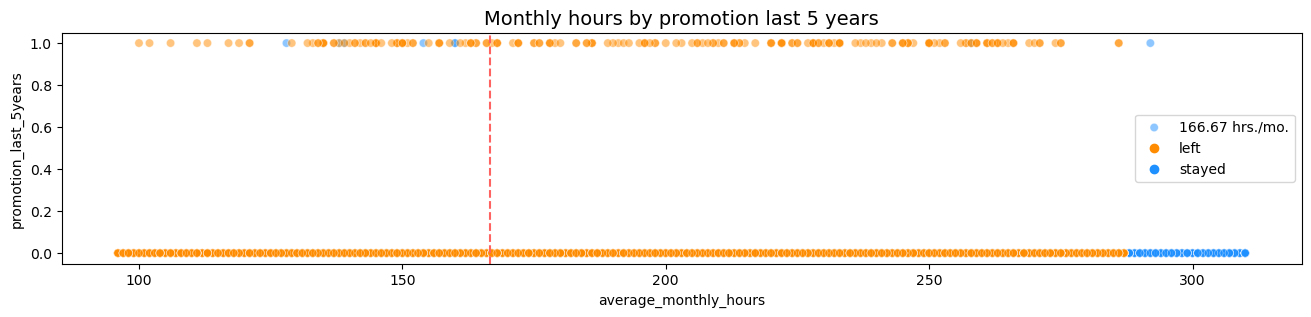

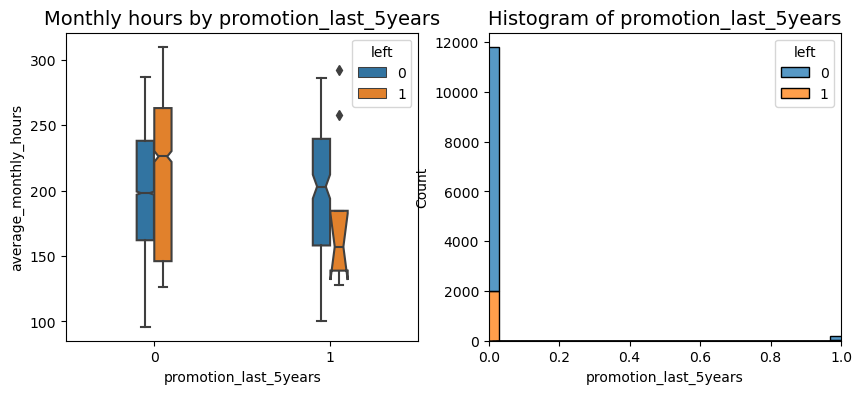

In [160]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5, palette=['darkorange','dodgerblue'], legend='full')
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');



# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create boxplot showing distributions of `promotion_last_5years` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, notch=True, y='average_monthly_hours', x='promotion_last_5years', width=0.2, hue='left', orient="v", ax=ax[0])

ax[0].set_title('Monthly hours by promotion_last_5years', fontsize='14')

# Create histogram showing distribution of `promotion_last_5years`, comparing employees who stayed versus those who left
promotion_last_5years_stay = df1[df1['left']==0]['promotion_last_5years']
promotion_last_5years_left = df1[df1['left']==1]['promotion_last_5years']
h=sns.histplot(data=df1, x='promotion_last_5years', hue='left', binwidth=0.01, multiple='stack',  shrink=5, ax=ax[1])
ax[1].set_title('Histogram of promotion_last_5years', fontsize='14')
h.set(xlim=(0,1))

plt.show();

In [161]:
df1[df1['promotion_last_5years']==0]['promotion_last_5years'].count()  #11788
df1[df1['promotion_last_5years']==1]['promotion_last_5years'].count()  #203

203

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, inspect how employees who left are distributed across departments.

In [162]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

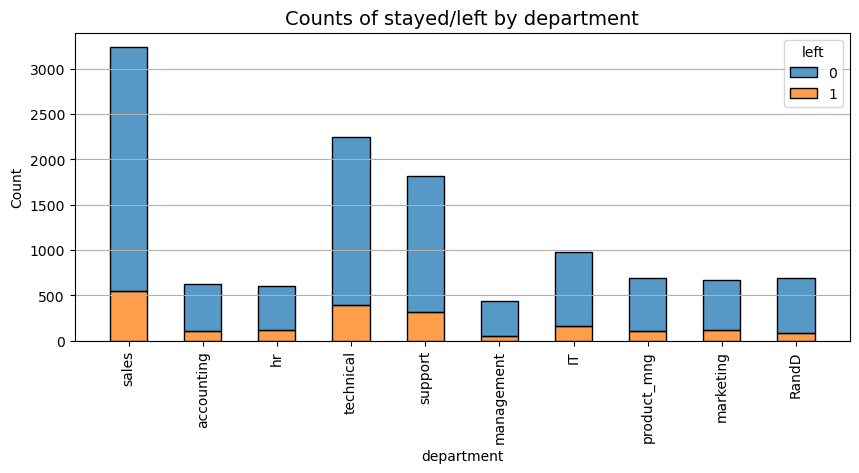

In [163]:
# Create stacked histogram to compare department distribution of employees who left to that of employees not leaving
plt.figure(figsize=(10,4))
g=sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='stack', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);
g.yaxis.grid(True)

There is no department that differs significantly in its proportion of employees who left the company. 

Lastly, check for strong correlations between variables in the data.

C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\1321605680.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


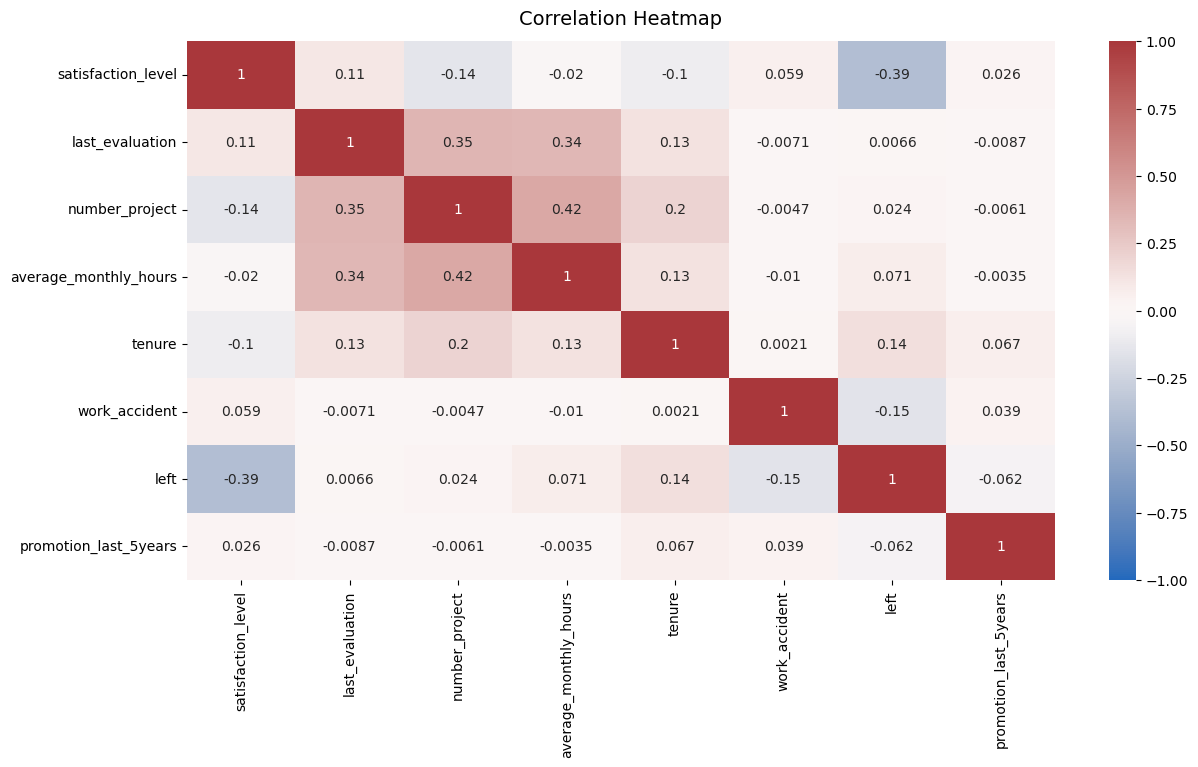

In [164]:
# Create a plot as needed 

# Plot a correlation heatmap
plt.figure(figsize=(14,7))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap shows:
- number of projects, monthly hours, and evaluation scores all have higher positive correlation with each other (compared to other variables)
- Left variable is negatively correlated to the satisfaction level variable

### Insights

- It seems employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. 
- It appears if an employee has spent more than six years at the company, they tend not to leave. 


# PACE: Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 





💭 
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, applicable are Logistic Regression models, or Tree-based Machine Learning models.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Start by one-hot encoding the categorical variables as needed.

In [165]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df_enc = pd.get_dummies(df1, prefix=['salary', 'dept'], columns = ['salary', 'department'], drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

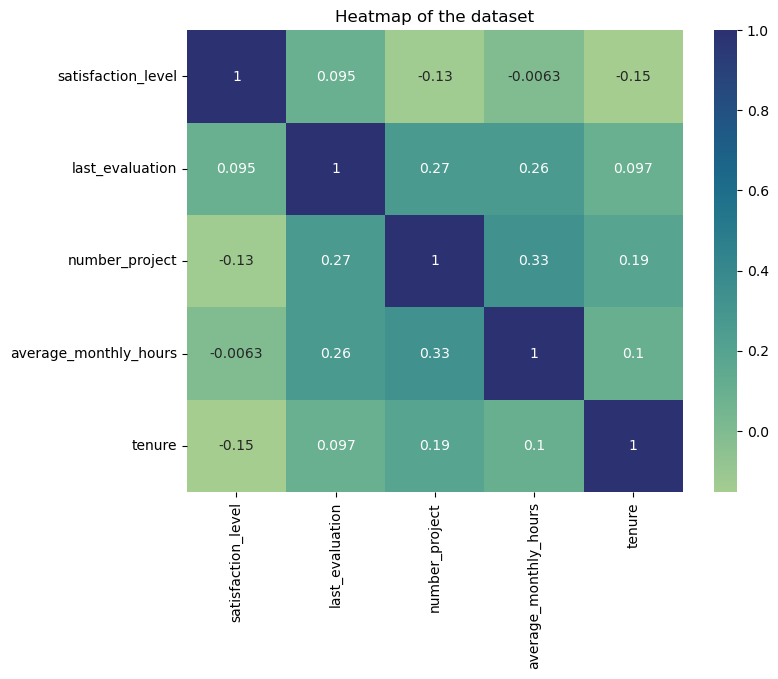

In [166]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a bar plot to visualize count of both employee groups across department.

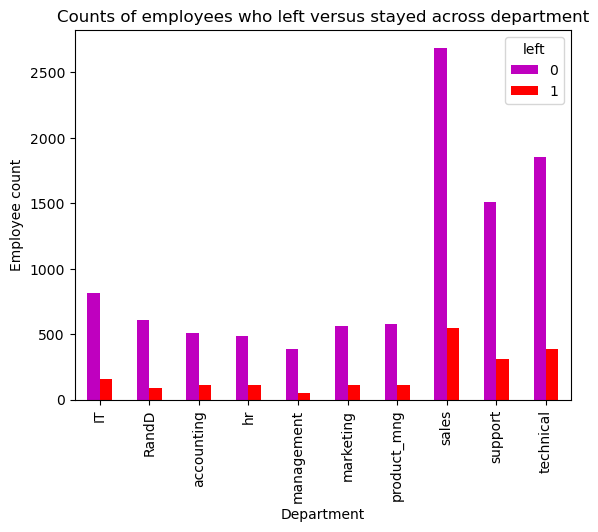

In [168]:
# Create a  bart plot to visualize numbers across department
pd.crosstab(df1["department"], df1["left"]).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, remove the outliers in `tenure`

In [169]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable, which is the variable you want your model to predict.

In [170]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, `left`.

In [171]:
# Select the features you want to use in your model
X = df_logreg[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set.

In [172]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [173]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [174]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

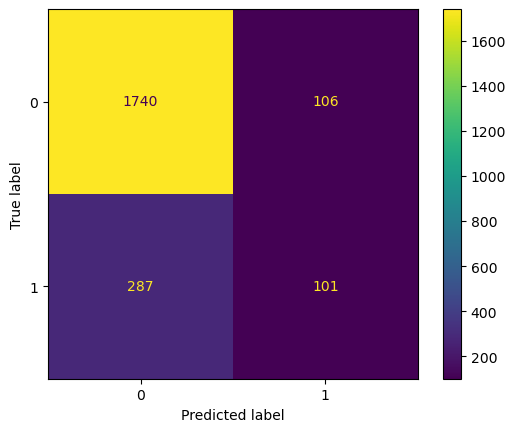

In [175]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [176]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [177]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.67      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

Encode the categorical variables.

In [178]:
# Encode categorical variables
df2 = pd.get_dummies(df1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Isolate the outcome variable.

In [179]:
# Isolate the outcome variable
y = df2['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select the features. 

In [180]:
# Select the features
X = df2.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Split the data into training, validating, and testing sets.

In [181]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [182]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [183]:
%%time
tree1.fit(X_tr, y_tr)

CPU times: total: 1.03 s
Wall time: 2.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

Identify the optimal values for the decision tree parameters.

In [184]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [185]:
# Check best AUC score on CV
tree1.best_score_

0.9703634179699269

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search. 

In [186]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

Use the function just defined to get all the scores from grid search.

In [187]:
# Get all CV scores (note AUC is used below as metric)
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

#### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [188]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [189]:
%%time
#see train_test_split above => # Create train & validate data
rf1.fit(X_tr, y_tr) # --> Wall time: ~13min

CPU times: total: 8min 59s
Wall time: 13min 23s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

Specify path to where you want to save your model.

In [6]:
# Define a path to the folder where you want to save the model
path = 'path'

Define functions to pickle the model and read in the model.

In [53]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [54]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [55]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [56]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [190]:
# Check best AUC score on CV
rf1.best_score_

0.9795790967836983

Identify the optimal values for the parameters of the random forest model.

In [191]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [192]:
# Get all CV scores (not AUC is used below as metric)
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.970363   0.922167  0.921337  0.921719  0.974007
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.979579   0.943576  0.923021  0.933145  0.978037


C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.008 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.


Next, you can evaluate these models on the validation set.

VALIDATION SET


Define a function that gets all the scores from a model's predictions.

In [194]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

Apply the function defined above to get scores for the decision tree model and the random forest model. 

In [195]:
# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)

# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


On the validation set, the random forest model outperforms the decision tree model across most metrics.

Now use the best performing model to predict on the test set.

In [196]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.955,0.961,0.917,0.938,0.98


RF1 test scores are similar to the validation scores which shows the model performs well on unseen (non-trained) data.

#### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. 

Data leakage is when you use data to train your model that should not be used during training, either because:
- it appears in the test data or 
- it's not data that you'd expect to have when the model is actually deployed 

Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that:
- the company won't have `satisfaction_level`s reported for ALL employees - as simply not all responded
- the `average_monthly_hours` is a source of some data leakage

If employees have already decided upon quitting, or have already identified by management as people to be fired, they may be working fewer hours. Same for responding to satisfaction levels: people leaving may not have any incentive repsonding at all to a survey on satisfaction.

- `last_evaluation` has also a timing issue as it's not clear when and with which frequency these evaluations happen. It may even be this score determines if an employee stays or leave (very low scores => employee may get fired, see also min of this score is 0.36)

Up next are the improved models considering above caveats:

- The first round of decision tree and random forest models included all variables as features
- This next round will incorporate feature engineering to build improved models


First, let's drop `satisfaction_level` and create a new binary feature called `overworked` measuring if employees are overworked.

In [197]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df3 = df1.drop('satisfaction_level', axis=1)

# Display first few rows of new df3
df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


In [198]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df3['overworked'] = df3['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [199]:
# Define `overworked` as working > 175 hrs/week
df3['overworked'] = (df3['overworked'] > 175).astype(int)

# Display first few rows of new column
df3['overworked'].head()
df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.53,2,157,3,0,1,0,sales,low,0
1,0.86,5,262,6,0,1,0,sales,medium,1
2,0.88,7,272,4,0,1,0,sales,medium,1
3,0.87,5,223,5,0,1,0,sales,low,1
4,0.52,2,159,3,0,1,0,sales,low,0


Now, let's also drop the `average_monthly_hours` column cause of the data leakage concern described above.



In [200]:
# Drop the `average_monthly_hours` column
df3 = df3.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.53,2,3,0,1,0,sales,low,0
1,0.86,5,6,0,1,0,sales,medium,1
2,0.88,7,4,0,1,0,sales,medium,1
3,0.87,5,5,0,1,0,sales,low,1
4,0.52,2,3,0,1,0,sales,low,0


Start by one-hot encoding the categorical variables as needed.

In [201]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df4 = pd.get_dummies(df3)

# Display the new dataframe
df4.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Isolate the outcome variable.

In [202]:
# Isolate the outcome variable
y = df4['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select the features. 

In [203]:
# Select the features
X = df4.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Split the data into training, validating, and testing sets.

In [204]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 2

In [206]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [208]:
%%time
tree2.fit(X_tr, y_tr)

CPU times: total: 844 ms
Wall time: 1.75 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

In [209]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [210]:
# Check best AUC score on CV
tree2.best_score_

0.9534827790328492

This model performs very well, even without satisfaction levels and detailed hours worked data. 

Next, check the other scores.

In [211]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
tree2_cv_results

C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree2 cv,0.953483,0.864826,0.902098,0.883024,0.960245


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Round 2

In [212]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [213]:
%%time
rf2.fit(X_tr, y_tr) # --> Wall time: 10min 7s

CPU times: total: 7min 25s
Wall time: 10min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

In [78]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [7]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

NameError: name 'read_pickle' is not defined

In [214]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [215]:
# Check best AUC score on CV
rf2.best_score_

0.9656664586139387

In [216]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree2 cv  0.953483   0.864826  0.902098  0.883024  0.960245
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.965666   0.909473  0.879506  0.894049  0.965388


C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


Again, the scores dropped slightly, but the random forest performs better than the decision tree. 

### Test the models on the validation set:

In [217]:
# Collect validation scores 
tree2_val_results = get_scores('decision tree2 val', tree2, X_val, y_val)
rf2_val_results = get_scores('random forest2 val', rf2, X_val, y_val)

# Concatenate validation scores into table
all_val_results2 = [tree2_val_results, rf2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

,model,AUC,precision,recall,f1,accuracy
0,decision tree2 val,0.942,0.883,0.907,0.895,0.965
0,random forest2 val,0.933,0.905,0.884,0.895,0.965


It appears the random forest performs slightly better than the decision tree, across most of the evaluation metrics.

Next, predict on the tests set using this random forest model.

In [218]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest2 test,0.935,0.898,0.889,0.894,0.965


Seems to be a stable, well-performing final model. 

Next, plot a confusion matrix to visualize how well it predicts on the test set.

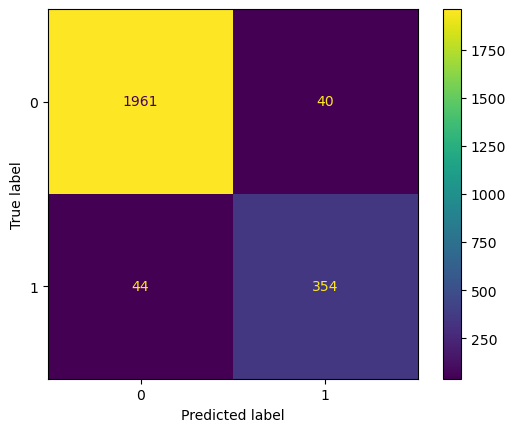

In [219]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot();

The model predicts less false positives than false negatives, which means some employees may not be identified as at risk of quitting or getting fired, when that's actually the case - who are actually at risk of doing so. But this is still a strong model.

For exploratory purpose, inspect the splits of the decision tree model and the most important features in the random forest model. 


#### Decision tree splits

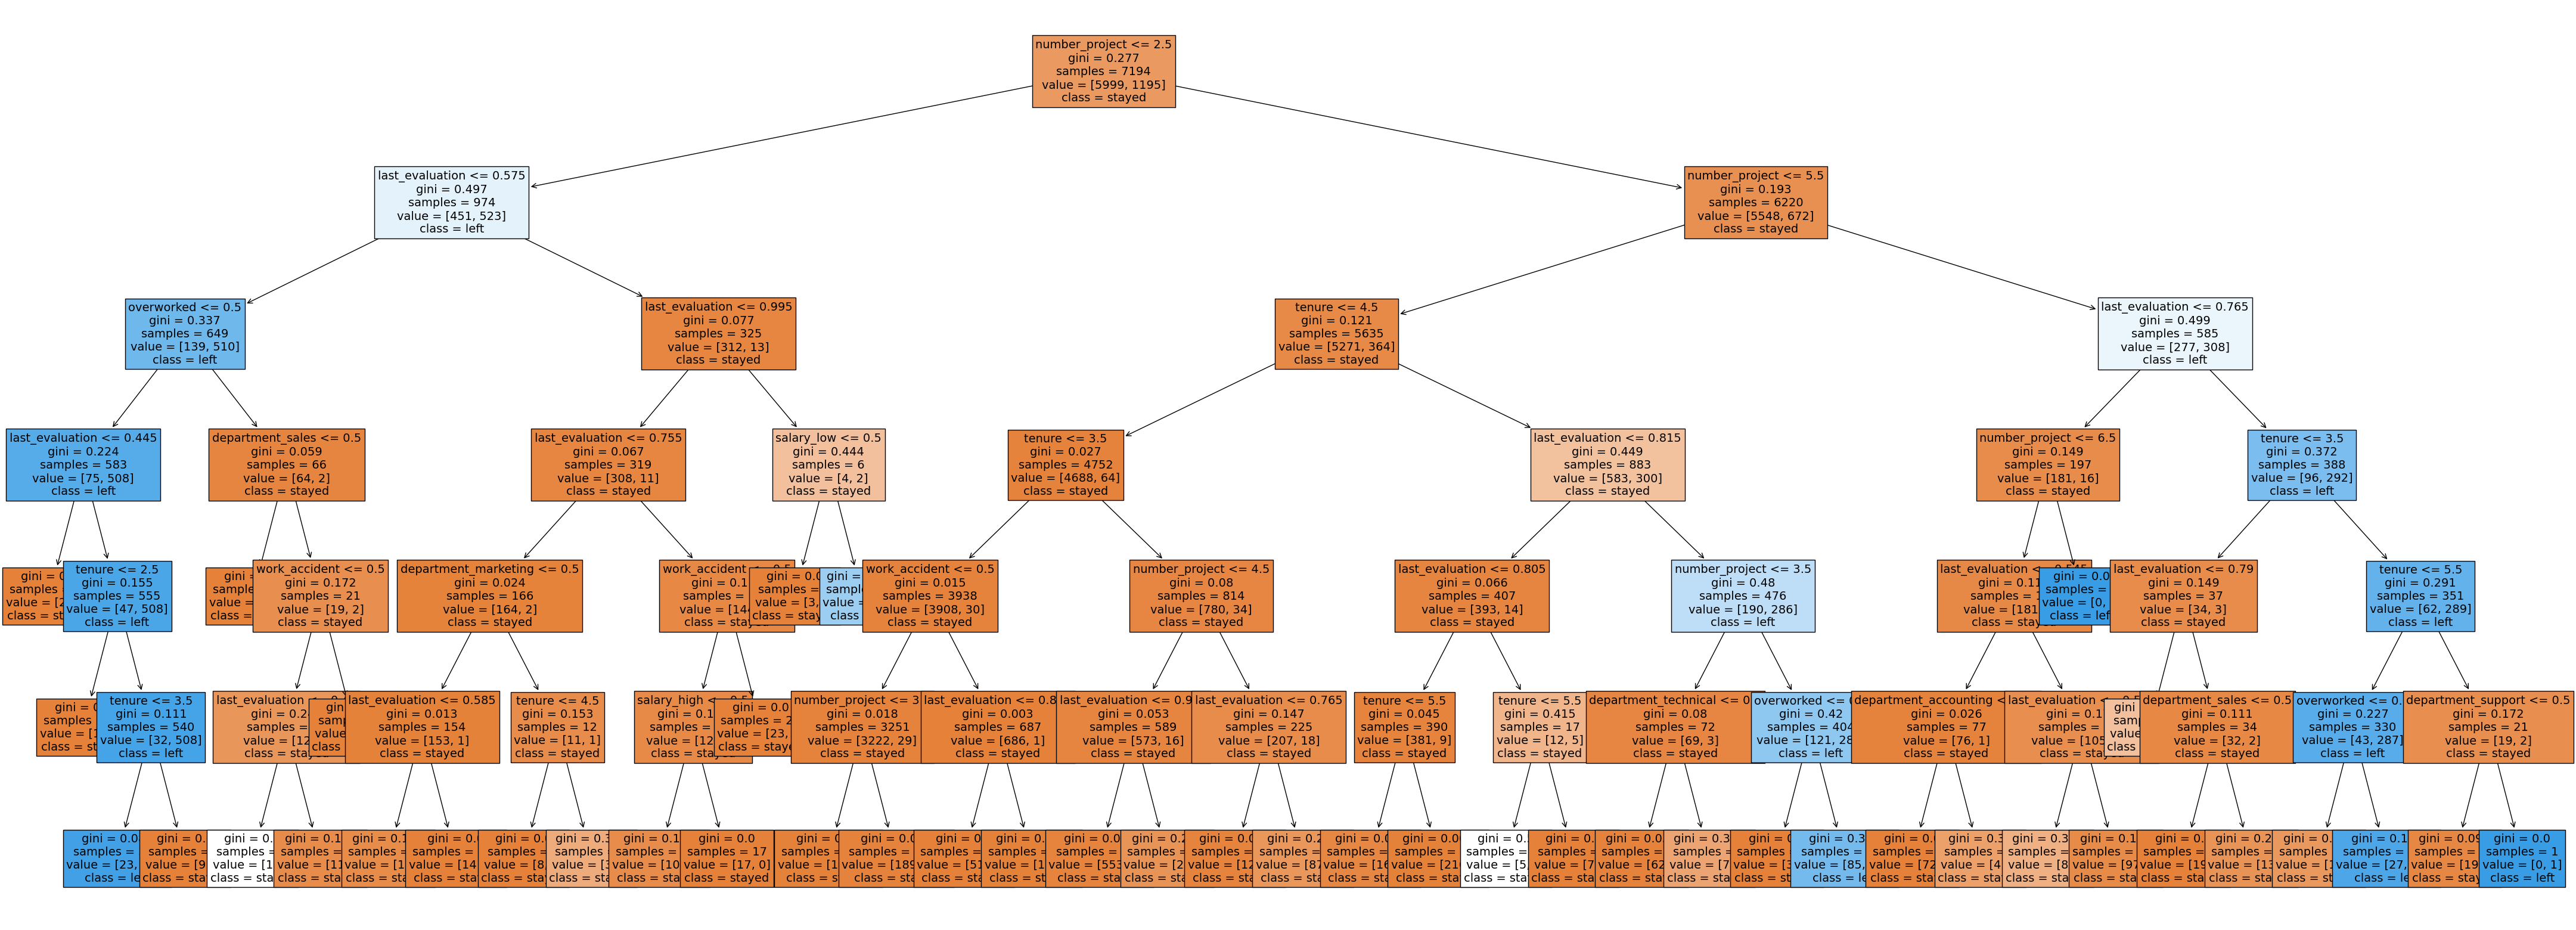

In [220]:
# Plot the tree
plt.figure(figsize=(55,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [221]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.381767
last_evaluation,0.353482
tenure,0.169771
overworked,0.091517
department_support,0.001099
salary_low,0.000853
department_technical,0.000429
department_sales,0.000357
work_accident,0.000282
department_accounting,0.000239


Next, visualize the decision tree feature importances.

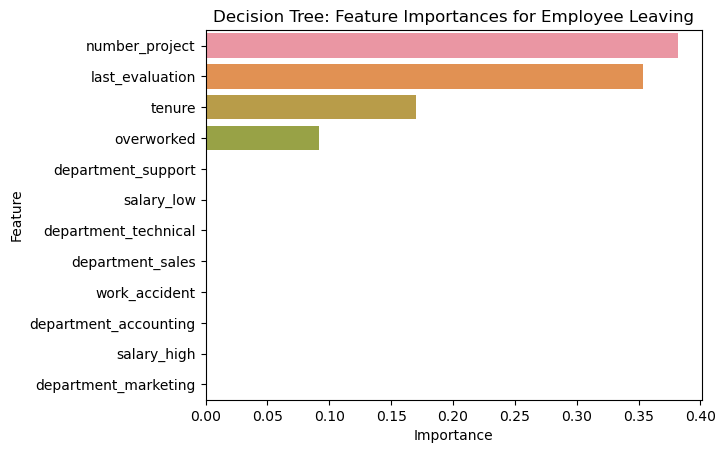

In [222]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows in this decision tree model `number_project`, `last_evaluation`, `tenure`, and `overworked` are most predictive as to the outcome variable, `left`.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

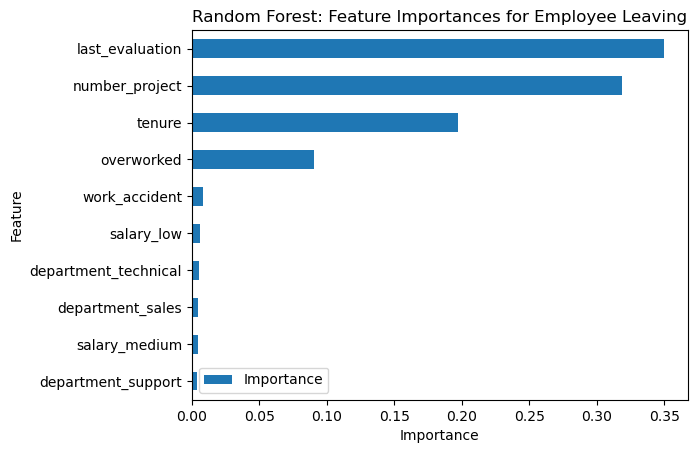

In [223]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot shows for the random forest model `last_evaluation`, `number_project`, `tenure`, `overworked` having the highest influence as predictor variables for the dependent variable, `left`.

#### Feature Engineering without last evaluation variable + including satisfaction level - results in tree3 and RF3

In [224]:
# Drop `last_evaluation` and save resulting dataframe in new variable
df5 = df1.drop('last_evaluation', axis=1)

# Display first few rows of new df3
df5.head()

,satisfaction_level,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,2,157,3,0,1,0,sales,low
1,0.80,5,262,6,0,1,0,sales,medium
2,0.11,7,272,4,0,1,0,sales,medium
3,0.72,5,223,5,0,1,0,sales,low
4,0.37,2,159,3,0,1,0,sales,low


In [225]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df6 = pd.get_dummies(df5)

# Display the new dataframe
df6.head()

,satisfaction_level,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [226]:
# Isolate the outcome variable
y = df6['left']

# Select the features
X = df6.drop('left', axis=1)

# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 3

In [227]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree3 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [228]:
%%time
tree3.fit(X_tr, y_tr)

CPU times: total: 1.16 s
Wall time: 2.09 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

In [229]:
# Check best params
tree3.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [230]:
# Check best AUC score on CV
tree3.best_score_

0.9705467617192485

In [231]:
# Get all CV scores
tree3_cv_results = make_results('decision tree3 cv', tree3, 'auc')
tree3_cv_results


C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree3 cv,0.970547,0.948388,0.923015,0.935515,0.978871


In [232]:
print(tree2_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree2 cv  0.953483   0.864826  0.902098  0.883024  0.960245


Comparing decision tree 3 having as independent variables:
- satisfaction_level, number_project, average_monthly_hours, tenure, etc. and not having last_evaluation 

against decision tree 2 having:
- last_evaluation, no satisfaction_level, number_project, tenure, overworked (derived from average_monthly_hours), etc. 

shows decision tree 3 model achieves higher scores. Which might point to the fact that the employee evaluation is less predictive than the satisfaction survey. This may be the case but, again, we do not know any timings of these fields as to when recorded and with which periodicity.  

#### Random forest Round 3

In [233]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [234]:
%%time
rf3.fit(X_tr, y_tr) #Wall time: 11min 40s

CPU times: total: 8min 13s
Wall time: 11min 53s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'})

In [235]:
# Check best params
rf3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [236]:
# Check best AUC score on CV
rf3.best_score_

0.9793494110436938

In [237]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

rf3_cv_results = make_results('random forest3 cv', rf3, 'auc')
print(tree3_cv_results)
print(rf3_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree2 cv  0.953483   0.864826  0.902098  0.883024  0.960245
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.965666   0.909473  0.879506  0.894049  0.965388
               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree3 cv  0.970547   0.948388  0.923015  0.935515  0.978871
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest3 cv  0.979349   0.933243  0.923015  0.928041   0.97623


C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,
C:\Users\adiz\AppData\Local\Temp\ipykernel_16512\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The score results and a comparison of the 'Round 3 models' shows they are performing better than the 'Round 2 models'

In [238]:
# Collect validation scores 
tree3_cv_results = get_scores('decision tree3 val', tree3, X_val, y_val)
rf3_val_results = get_scores('random forest3 val', rf3, X_val, y_val)

# Concatenate validation scores into table
all_val_results3 = [tree3_cv_results, rf3_val_results]
all_val_results3 = pd.concat(all_val_results3).sort_values(by='AUC', ascending=False)
all_val_results3

,model,AUC,precision,recall,f1,accuracy
0,decision tree3 val,0.956,0.968,0.917,0.942,0.981
0,random forest3 val,0.954,0.948,0.917,0.932,0.978


In [239]:
# Get predictions on test data
rf3_test_scores = get_scores('random forest3test', rf3, X_test, y_test)
rf3_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest3test,0.953,0.955,0.915,0.935,0.979


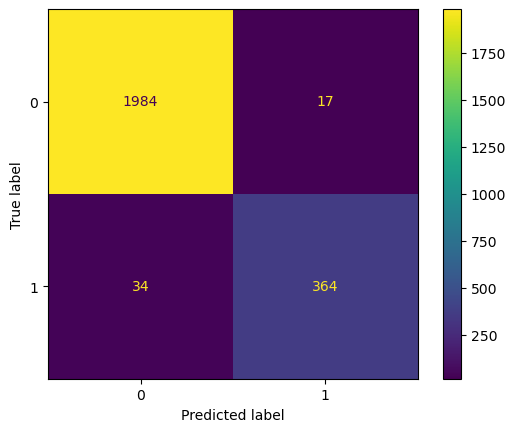

In [240]:
# Generate array of values for confusion matrix
preds = rf3.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf3.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf3.classes_)
disp.plot();

Also this RF model predicts less false positives than false negatives and overall it appears to be a strong model.

Next, show decision tree feature importance

In [241]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree3_importances = pd.DataFrame(tree3.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree3_importances = tree3_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree3_importances = tree3_importances[tree3_importances['gini_importance'] != 0]
tree3_importances

,gini_importance
satisfaction_level,0.560808
average_monthly_hours,0.152973
number_project,0.147685
tenure,0.138534


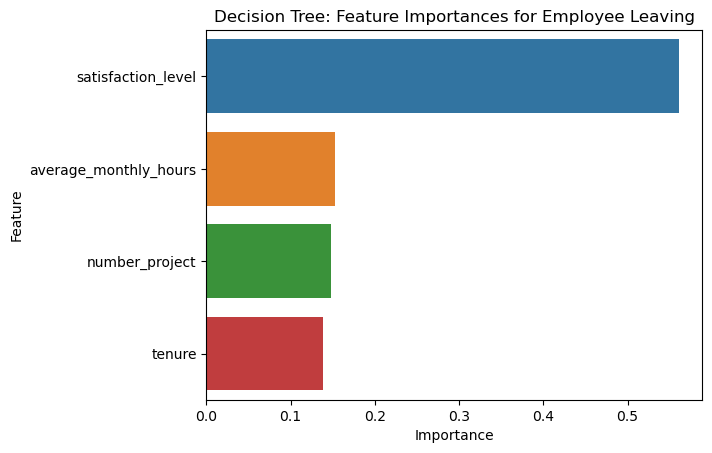

In [242]:
sns.barplot(data=tree3_importances, x="gini_importance", y=tree3_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random RF3 Forest Feature Importance

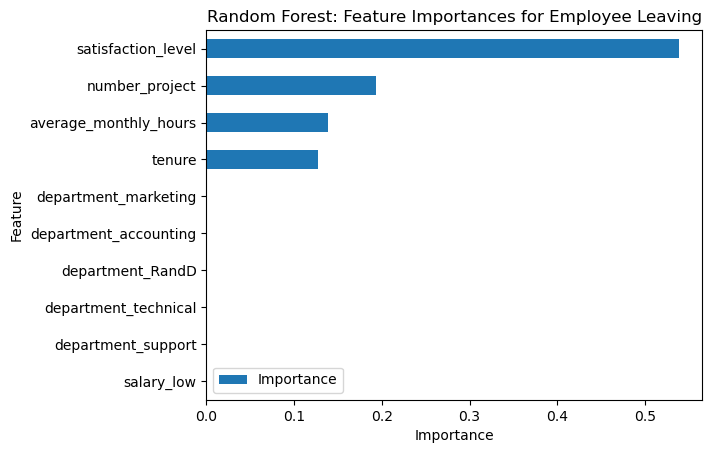

In [243]:
# Get feature importances
feat_impt = rf3.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf3.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Consider how predictions change when `last_evaluation` is removed from the data: satisfaction level is amongst the others by far the most predictive variable.

- Evaluations may not be performed very frequently, in this case we could promote the models not using last_evaluation data. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. 

- The same could be true for satisfaction score. As soon as employee satisfaction is low, we can assume rising employee turnover. E.g. it may be that the self-reported satisfaction level is requested in return as soon as the employee gets his evaluation score by his supervisor. But again, we do not know - especially the data actuality: when exactly the satisfaction score has been given? What is the notice period? What's the exact leave date?

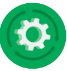
# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭 
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How? 
- What business recommendations do you propose based on the models built? 
- Given what you know about the data and the models you were using, what other questions could you address for the team? 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model had a precision of 80%, recall of 83%, f1-score of 80% , accuracy of 83% on the test data set.

**Tree-based Machine Learning**

After applying feature engineering, the decision tree model had an AUC of 94.3%, precision of 86.5%, recall of 91.5%, f1-score of 88.9%, accuracy of 96.2%, on the test set. 
The random forest model marginally outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm employees at the company are overworked. 

To raise employee retention stakeholders were to consider:

- The number of projects that employees work on should be limited or carefully planned to avoid overworking of employees
- Promotions / bonuses for employees with tenures of 4+ years, investigate reason for the four-year tenures dissatisfaction 
- Same as above for working longer hours, including overtime compensation (payoff or time) with clear overtime policy - quick, easy & transparent for employees to handle
- High evaluation scores should be a function of quality, time, impact, social intelligence and work culture (motivational to colleagues etc) 

**Next Steps**

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 